In [20]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import plotnine as pn
from plotnine import ggplot, geom_line, geom_point, xlab, ylab, aes


In [21]:
con = sql.connect('crn.db')

In [22]:
df = pd.read_sql_query('SELECT * FROM CompletePopulations', con)

In [23]:
df

,ivp_id,time,short_name,population
0,1,0,empty,10.000000
1,1,1,empty,1.396797
2,1,2,empty,1.209959
3,1,3,empty,1.016530
4,1,4,empty,0.873446
...,...,...,...,...
5195,4,95,AaC9X,0.018288
5196,4,96,AaC9X,0.018288
5197,4,97,AaC9X,0.018288
5198,4,98,AaC9X,0.018288


In [24]:
from siuba import _, select, filter, arrange, group_by, summarize, mutate


In [34]:
(df >>
 filter(_.ivp_id == 4) >>
 filter(_.time == 0))

,ivp_id,time,short_name,population
3900,4,0,empty,10.0
4000,4,0,C3,50.0
4100,4,0,C9,10.0
4200,4,0,X,10.0
4300,4,0,Aa,10.0
4400,4,0,C3a,10.0
4500,4,0,C9a,10.0
4600,4,0,C3aX,10.0
4700,4,0,C9aX,10.0
4800,4,0,C9X,10.0


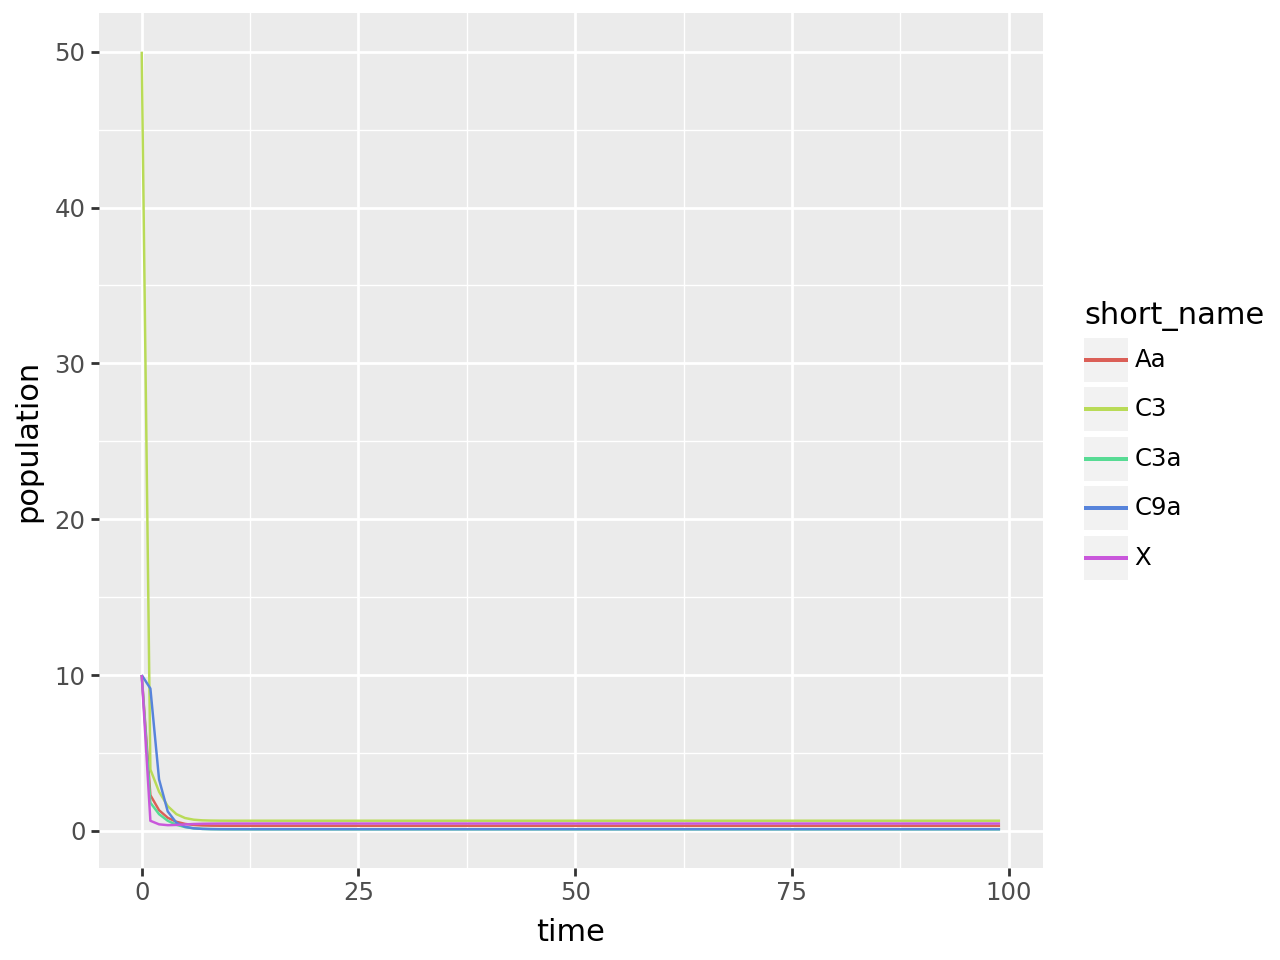

In [35]:
(
    df >>
    filter(_.short_name.isin(['Aa', 'C3a', 'X', 'C3', 'C9a'])) >>
    filter(_.ivp_id == 4) >>
    group_by(_.short_name) >>
    ggplot(aes('time', 'population', color = 'short_name')) +
    geom_line()
)

In [17]:
(
    df >>
    filter(_.short_name in ['Aa', 'C3a', 'X']) >>
    group_by(_.short_name) >>
    ggplot(aes('time', 'population', color = 'short_name')) +
    geom_line()
)

TypeError: Symbolic objects can not be converted to True/False, or used with these keywords: not, and, or.